In [1]:
import numpy as np
import matplotlib.pyplot as plt

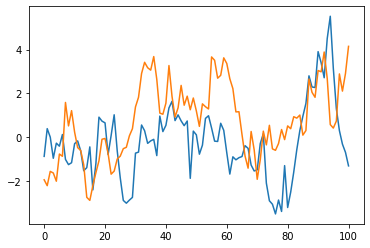

In [29]:
a = 0.8
b = 0.9
T = 101

def gen_ar1(a, T, s = 1):
    X = np.zeros(T)
    X[0] = np.random.normal(0, s / (1 - a ** 2))

    for t in range(1, T):
        X[t] = a * X[t - 1] + np.random.normal(0, s)
        
    return X

def exp_cost_ar(a_true, a_est, s = 1):
    return s + (a_true - a_est) ** 2 * 1 / (1 - a_true ** 2)

def exp_cost_model(a_true, a_est, a, s = 1):
    return s + (a_true - a_est) ** 2 * (1 / (1 - a ** 2) + a_true)
    
X_1 = gen_ar1(a, T)
X_2 = gen_ar1(b, T)

plt.plot(X_1)
plt.plot(X_2)

3.7777777777777786
3.1527441857764225


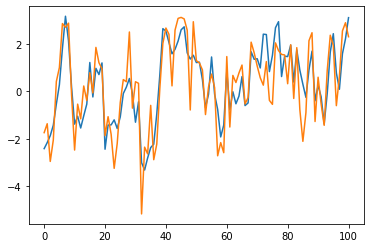

In [3]:
s = 1
Y = X_1 + np.random.normal(0, s, T)

print(1 / (1 - a ** 2) + 1)
print(np.cov(Y))
plt.plot(X_1)
plt.plot(Y)

In [7]:
## least squares estimate of the regression Y = aX_1 + bX_2
# ((X_1, X_2) (X_1, X_2)^T) ^-1 X Y
a, b, T = 0.8, 0.9, 100
X_1, X_2 = gen_ar1(a, T), gen_ar1(b, T)
Y = X_1 + np.random.normal(0, 1, T)
print(f"True a: {round(a, 2)}. True b: {round(b, 2)}. Time T: {T}.\n")

lam = 0
X_comb = np.vstack((X_1, X_2))
coefs = np.linalg.inv(X_comb @ X_comb.T + lam * np.identity(2)) @ X_comb @ Y
print(f"LS Estimates a, b:\t{np.round(coefs, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - coefs @ X_comb, 2) ** 2, 4)}.")
print(f"CV using X1 and X2:\t{round(cv_nd(X_comb, Y), 4)}.")

# least squares estimate of the regression Y = aX_1
a_est = 1 / (np.dot(X_1, X_1.T)) * X_1 @ Y
print(f"\nLS estimate a:\t\t{round(a_est, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - a_est * X_1, 2) ** 2, 4)}.")
print(f"CV Using X1:\t\t{round(cv_1d(X_1, Y)[0], 4)}.")

# least squares estimate of the regression Y = bX_2
b_est = 1 / (np.dot(X_2, X_2.T)) * X_2 @ Y
print(f"\nLS estimate b:\t\t{round(b_est, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - b_est * X_2, 2) ** 2, 4)}.")
print(f"CV Using X2:\t\t{round(cv_1d(X_2, Y)[0], 4)}.")

True a: 0.8. True b: 0.9. Time T: 100.

LS Estimates a, b:	[0.91 0.06].
Emprirical risk:	1.0204.
CV using X1 and X2:	1.0607.

LS estimate a:		0.93.
Emprirical risk:	1.0474.
CV Using X1:		1.0652.

LS estimate b:		0.15.
Emprirical risk:	3.3153.
CV Using X2:		3.3803.


In [11]:
## least squares estimate of the regression Y = aX_1 + bX_2
# ((X_1, X_2) (X_1, X_2)^T) ^-1 X Y
a, b, T = 0.8, 0.9, 100
X_1, X_2 = gen_ar1(a, T), gen_ar1(b, T)
Y = X_1 + np.random.normal(0, 1, T)
print(f"True a: {round(a, 2)}. True b: {round(b, 2)}. Time T: {T}.\n")

X_comb = np.vstack((X_1, X_2))
coefs = np.linalg.inv(X_comb @ X_comb.T + lam * np.identity(2)) @ X_comb @ Y
print(f"LS Estimates a, b:\t{np.round(coefs, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - coefs @ X_comb, 2) ** 2, 4)}.")
print(f"CV using X1 and X2:\t{round(cv_nd(X_comb, Y), 4)}.")

# least squares estimate of the regression Y = aX_1
a_est = 1 / (np.dot(X_1, X_1.T)) * X_1 @ Y
print(f"\nLS estimate a:\t\t{round(a_est, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - a_est * X_1, 2) ** 2, 4)}.")
print(f"CV Using X1:\t\t{round(cv_1d(X_1, Y)[0], 4)}.")

# least squares estimate of the regression Y = bX_2
b_est = 1 / (np.dot(X_2, X_2.T)) * X_2 @ Y
print(f"\nLS estimate b:\t\t{round(b_est, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - b_est * X_2, 2) ** 2, 4)}.")
print(f"CV Using X2:\t\t{round(cv_1d(X_2, Y)[0], 4)}.")

# least squares estimate of the regression Y = X_1 + b X_2
Y2 = Y - X_1
b_est_2 = 1 / (np.dot(X_2, X_2.T)) * X_2 @ Y2
print(f"\nLS estimate b, a = 1:\t{round(b_est_2, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y2 - b_est_2 * X_2, 2) ** 2, 4)}.")
print(f"CV Using X2, a = 1:\t{round(cv_1d(X_2, Y2)[0], 4)}.")

# using only a = 1 fixed, no model training
print(f"\nCV Using X1, a = 1:\t{round(1 / T * np.linalg.norm(Y2, 2) ** 2, 4)}.")

True a: 0.8. True b: 0.9. Time T: 100.

LS Estimates a, b:	[1.01 0.04].
Emprirical risk:	1.0389.
CV using X1 and X2:	1.0839.

LS estimate a:		0.97.
Emprirical risk:	1.0498.
CV Using X1:		1.0704.

LS estimate b:		-0.21.
Emprirical risk:	3.0968.
CV Using X2:		3.1718.

LS estimate b, a = 1:	0.04.
Emprirical risk:	1.0391.
CV Using X2, a = 1:	1.0622.

CV Using X1, a = 1:	1.0515.


In [56]:
from tqdm import tqdm

def compare_bias(a, b, T, iters = 1000):
    
    diffs = []
    
    # do CV AR(2)
    for i in tqdm(range(iters)):
        X_1, X_2 = gen_ar1(a, T, 0.01), gen_ar1(b, T, 0.01)
        Y = X_1 + np.random.normal(0, 1, T)
        Y2 = Y - X_1
        
        diffs.append(compute_bias(X_2, Y2))
        
    # check which one achieves lowest MSE
    return diffs

total_list = []
b = 0.99
a_range = [0.99]
T_range = [5]
iters = 100000

for T in T_range:
    print(f"{T}:", end = "\t")
    a_list = []
    for a in a_range:
        print(round(a, 2), end = "\t")
        a_list.append(compare_bias(a, b, T, iters = min(50000, iters // T)))
    print(np.round(a_list, 2))
    total_list.append(a_list)
    print()
    
total_list = np.array(total_list)

  2%|█▉                                                                          | 499/20000 [00:00<00:03, 4983.21it/s]

5:	0.99	

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:05<00:00, 3476.92it/s]

[[-0.45 -0.31 -0.52 ... -0.23 -0.57  0.76]]



### Influence of $a$

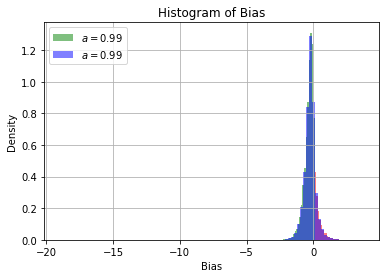

In [57]:
# the histogram of the data
n, bins, patches = plt.hist(total_list[0][0], 100, density=True, facecolor='g', alpha=0.5, label = fr"$a = {a}$")

for b, p in zip(bins, patches):
    if b > 0:
        p.set_facecolor("red")

n, bins, patches = plt.hist(old, 100, density=True, facecolor='b', alpha=0.5, label = fr"$a = {a}$")
        
plt.xlabel('Bias')
plt.ylabel('Density')
plt.title('Histogram of Bias')
plt.grid(True)
plt.legend()
plt.show()

old = total_list[0][0]

### Succes probability

In [262]:
print(np.array(total_list[0][0]) < 1)
sum(total_list[0] < 0)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

TypeError: '<' not supported between instances of 'list' and 'int'

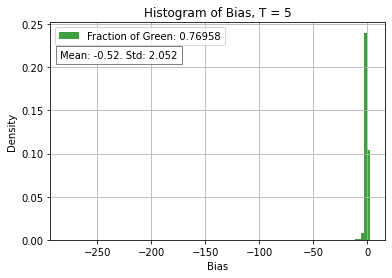

In [327]:
# the histogram of the data
lst = (np.array(total_list[0][0]))
f = plt.figure()
ax = f.add_subplot(111)

n, bins, patches = ax.hist(lst, 100, density=True, facecolor='g', alpha=0.75, label = f"Fraction of Green: {sum(lst < 0) / len(lst)}")

for b, p in zip(bins, patches):
    if b > 0:
        p.set_facecolor("red")
    
plt.xlabel('Bias')
plt.ylabel('Density')
plt.title(f'Histogram of Bias, T = {T}')
t = plt.text(0.03, 0.85, f'Mean: {round(lst.mean(), 3)}. Std: {round(lst.std(), 3)}', ha='left', va='center', transform=ax.transAxes)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor = 'grey'))
plt.grid(True)
plt.legend()
plt.show()

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

(1000,)


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.02it/s]


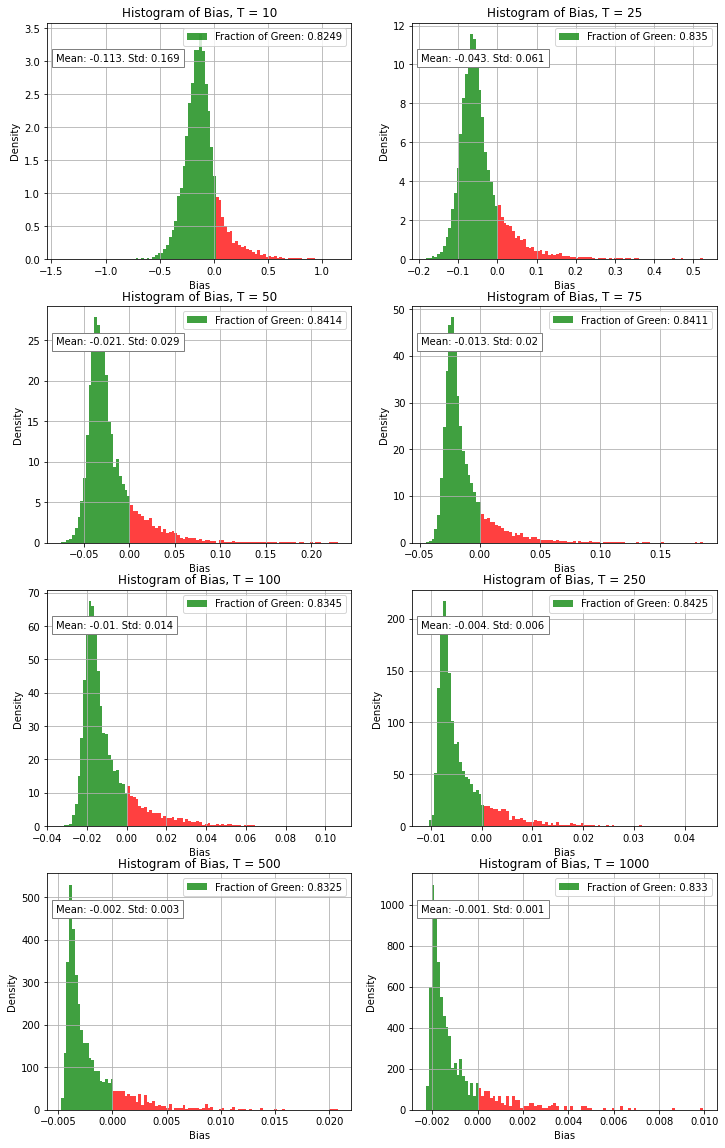

In [276]:
# the histogram of the data
print(np.shape(total_list[i][0]))
f = plt.figure(figsize = (12, 20))

for i in tqdm(range(8)):
    lst = np.array(total_list[i][0])
    ax = f.add_subplot(int(f"42{i + 1}"))

    n, bins, patches = ax.hist(lst, 100, density=True, facecolor='g', alpha=0.75, label = f"Fraction of Green: {round(sum(lst < 0) / len(lst), 4)}")

    for b, p in zip(bins, patches):
        if b > 0:
            p.set_facecolor("red")
    
    plt.xlabel('Bias')
    plt.ylabel('Density')
    plt.title(f'Histogram of Bias, T = {T_range[i]}')
    t = plt.text(0.03, 0.85, f'Mean: {round(lst.mean(), 3)}. Std: {round(lst.std(), 3)}', ha='left', va='center', transform=ax.transAxes)
    t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor = 'grey'))
    plt.grid(True)
    plt.legend()

In [300]:
def compare_cvs2(a, b, T, iters = 10):
    
    count = 0
    
    # do CV AR(2)
    for i in range(iters):
        X_1, X_2 = gen_ar1(a, T), gen_ar1(b, T)
        Y = X_1 + np.random.normal(0, 1, T)
        Y2 = Y - X_1
        
        cv_ar2 = cv_1d(X_2, Y2)[0]
        cv_ar1 = 1 / T * np.linalg.norm(Y2, 2) ** 2
        
        count += cv_ar1 < cv_ar2
        
    # check which one achieves lowest MSE
    return count / iters

total_list = []
b = 0.0
a_range = [0.0] # np.linspace (0.55, 0.95, 5)
T_range = [11, 16, 26, 51, 101, 251, 1001]
iters = 10000

for T in T_range:
    print(f"{T}:", end = "\t")
    a_list = []
    for a in a_range:
        print(round(a, 2), end = "\t")
        a_list.append(compare_cvs2(a, b, T, iters = iters))
    print(np.round(a_list, 2))
    total_list.append(a_list)
    print()
    
total_list = np.array(total_list)
print(total_list)

11:	0.0	

KeyboardInterrupt: 

In [312]:
def compare_cvs(a, b, T, iters = 10):
    
    count = 0
    
    # do CV AR(2)
    for i in range(iters):
        X_1, X_2 = gen_ar1(a, T), gen_ar1(b, T)
        Y = X_1 + np.random.normal(0, 1, T)
        
        cv_ar2 = cv_nd(np.vstack((X_1, X_2)), Y)
        cv_ar1 = cv_1d(X_1, Y)[0]
        
        count += cv_ar1 < cv_ar2
        
    # check which one achieves lowest MSE
    return count / iters

total_list = []
a = 0.0
b_range = np.linspace(0.00, 0.99, 5)
T_range = [10, 20, 50, 100, 250]
iters = 10000

for T in T_range:
    print(f"{T}:", end = "\t")
    b_list = []
    for b in b_range:
        print(round(b, 2), end = "\t")
        b_list.append(compare_cvs2(a, b, T, iters = iters))
    print(np.round(b_list, 2))
    total_list.append(b_list)
    print()
    
total_list = np.array(total_list)

10:	0.0	0.25	0.5	0.74	0.99	[0.8  0.79 0.8  0.79 0.82]

20:	0.0	0.25	0.5	0.74	0.99	[0.81 0.8  0.82 0.82 0.83]

50:	0.0	0.25	0.5	0.74	0.99	[0.83 0.83 0.83 0.84 0.83]

100:	0.0	0.25	0.5	0.74	0.99	[0.83 0.83 0.83 0.84 0.84]

250:	0.0	0.25	0.5	0.74	0.99	[0.84 0.84 0.84 0.84 0.84]



### 2D grid

In [313]:
# backup = total_list.copy()
print(total_list)

[[0.7962 0.7875 0.7979 0.7944 0.8193]
 [0.8102 0.8023 0.8157 0.8152 0.8303]
 [0.8324 0.8296 0.8307 0.8352 0.8345]
 [0.8297 0.8347 0.8323 0.8358 0.8434]
 [0.8432 0.8444 0.8433 0.8384 0.842 ]]


### As a function of $T$, fixed $b$

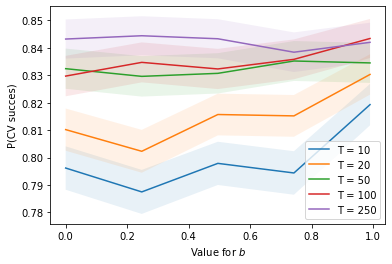

In [316]:
plt.xlabel(r"Value for $b$")
plt.ylabel(r"P(CV succes)")
for i, b_list in enumerate(total_list):
    plt.plot(b_range, b_list, label = f"T = {round(T_range[i], 2)}")
    plt.legend()
    
    dev = 1.96 * np.sqrt(b_list * (1 - b_list) / iters)
    plt.fill_between(b_range, b_list - dev, b_list + dev, alpha = 0.1)

### As a function of $a$, fixed $T$

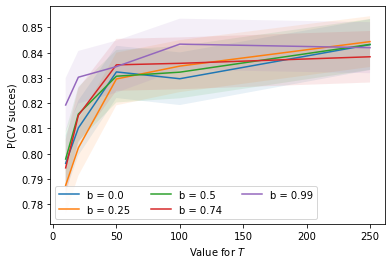

In [317]:
plt.xlabel(r"Value for $T$")
plt.ylabel(r"P(CV succes)")
for i, T_list in enumerate(total_list.T):
    plt.plot(T_range, T_list, label = f"b = {round(b_range[i], 2)}")
    plt.legend(ncol = 3)
    
    dev = 1.96 * np.sqrt(T_list * (1 - T_list) / 5000)
    plt.fill_between(T_range, T_list - dev, T_list + dev, alpha = 0.1)

In [116]:
# cross validation
# train with only a and check emprirical risk
features = X_comb.copy()
labels = Y.copy()
cv_scores = []

# for each sample
for i in range(T):
    # split data
    features_del, labels_del = np.delete(features, i, axis = 1), np.delete(labels, i)
    features_test, labels_test = features[:, i], labels[i]
    
    # train on del set
    coefs = np.linalg.inv(features_del @ features_del.T) @ features_del @ labels_del
    
    # test on test set
    cv_scores.append(((labels_test - features_test @ coefs) ** 2))

# report mean
print(f"CV-MSE^2: {round(np.mean(np.array(cv_scores)), 4)}.")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 99)

In [115]:
# cross validation
# train with only a and check emprirical risk
features = X_1.copy()
labels = Y.copy()
cv_scores = []

# for each sample
for i in range(T):
    # split data
    features_del, labels_del = np.delete(features, i), np.delete(labels, i)
    features_test, labels_test = features[i], labels[i]
    
    # train on del set
    coefs = 1 / (features_del @ features_del.T) * features_del @ labels_del
    
    # test on test set
    cv_scores.append((labels_test - features_test * coefs) ** 2)

# report mean
print(f"CV-MSE^2: {round(np.mean(np.array(cv_scores)), 4)}.")

CV-MSE^2: 1.0918.


In [114]:
# cross validation
# train with only b and check emprirical risk
features = X_2.copy()
labels = Y.copy()
cv_scores = []

# for each sample
for i in range(T):
    # split data
    features_del, labels_del = np.delete(features, i), np.delete(labels, i)
    features_test, labels_test = features[i], labels[i]
    
    # train on del set
    coefs = 1 / (features_del @ features_del.T) * features_del @ labels_del
    
    # train on test set
    cv_scores.append((labels_test - features_test * coefs) ** 2)

# report mean
print(f"CV-MSE^2: {round(np.mean(np.array(cv_scores)), 4)}.")

CV-MSE^2: 4.0356.


In [5]:
def compute_bias(features, labels):
    
    T = np.shape(labels)[0]
    bias = []
    
    # for each sample
    for i in range(T):
        # split data
        features_del, labels_del = np.delete(features, i), np.delete(labels, i)
        features_test, labels_test = features[i], labels[i]

        # train on del set
        coefs = 1 / (features_del @ features_del.T) * features_del @ labels_del

        # train on test set
        bias.append(coefs * features_test * (2 * labels_test - coefs * features_test))
    
    return np.mean(bias)

def cv_1d(features, labels):
    
    T = np.shape(labels)[0]
    cv_scores = []
    cv_scores_2 = []
    
    # for each sample
    for i in range(T):
        # split data
        features_del, labels_del = np.delete(features, i), np.delete(labels, i)
        features_test, labels_test = features[i], labels[i]

        # train on del set
        coefs = 1 / (features_del @ features_del.T) * features_del @ labels_del

        # train on test set
        cv_scores.append((labels_test - features_test * coefs) ** 2)
        res = labels_test
        cv_scores_2.append(coefs * features_test * (2 * res - coefs * features_test))
        
    
    return np.mean(np.array(cv_scores)), np.mean(np.array(cv_scores_2))

def cv_nd(features, labels):
    
    T = np.shape(labels)[0]
    cv_scores = []
    
    # for each sample
    for i in range(T):
        # split data
        features_del, labels_del = np.delete(features, i, axis = 1), np.delete(labels, i)
        features_test, labels_test = features[:, i], labels[i]

        # train on del set
        coefs = np.linalg.inv(features_del @ features_del.T) @ features_del @ labels_del

        # test on test set
        cv_scores.append(((labels_test - features_test @ coefs) ** 2))

    return np.mean(np.array(cv_scores))

coefs = np.linalg.inv(X_comb @ X_comb.T) @ X_comb @ Y
a_est = 1 / (np.dot(X_1, X_1.T)) * X_1 @ Y
b_est = 1 / (np.dot(X_2, X_2.T)) * X_2 @ Y

print(f"CV Using X1:\t\t{round(cv_1d(X_1, Y)[0], 4)}. MSE on X1:\t{1 / T * np.linalg.norm(Y - a_est * X_1, 2) ** 2}")
print(f"CV Using X2:\t\t{round(cv_1d(X_2, Y)[0], 4)}. MSE on X2:\t{1 / T * np.linalg.norm(Y - b_est * X_2, 2) ** 2}")
print(f"CV using X1 and X2:\t{round(cv_nd(X_comb, Y), 4)}. MSE on X1 + X2:\t{1 / T * np.linalg.norm(Y - coefs @ X_comb, 2) ** 2}")

CV Using X1:		1.1235. MSE on X1:	1.1010865253194622
CV Using X2:		4.8233. MSE on X2:	4.757744154050123
CV using X1 and X2:	1.0829. MSE on X1 + X2:	1.0310416444428843


In [192]:
X_1, X_2 = gen_ar1(a, T), gen_ar1(b, T)
Y = X_1 + np.random.normal(0, 1, T)
Y2 = Y - X_1

print(cv_1d(X_2, Y2)[1])
cv_ar2 = cv_1d(X_2, Y2)[0]
cv_ar1 = 1 / T * np.linalg.norm(Y2, 2) ** 2
print(cv_ar1 - cv_ar2)
compute_bias(X_2, Y2)

-0.014110405614425545
-0.014110405614425447


-0.014110405614425545

In [394]:
def MSE_1d(X, Y):
    coefs = 1 / (X @ X.T) * X @ Y
    return 1 / np.shape(Y)[0] * np.linalg.norm(Y - X * coefs, 2) ** 2

def MSE_nd(X, Y):
    coefs = np.linalg.inv(X @ X.T) @ X @ Y
    return 1 / np.shape(Y)[0] * np.linalg.norm(Y - coefs @ X, 2) ** 2

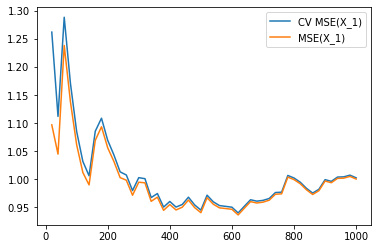

In [408]:
a, b, s = 0.5, 0.5, 1
T = 1000

X_1 = gen_ar1(a, T)
X_2 = gen_ar1(b, T)

Y = X_1 + np.random.normal(0, s, T)

cv_1 = []
cv_2 = []
cv_12 = []

mse_1 = []
mse_2 = []
mse_12 = []

for t in range(20, T + 1, 20):
    X_1t, X_2t, Y_t = X_1[:t], X_2[:t], Y[:t]
    X_comb = np.vstack((X_1t, X_2t))
    
    cv_1.append(cv_1d(X_1t, Y_t))
    cv_2.append(cv_1d(X_2t, Y_t))
    cv_12.append(cv_nd(X_comb, Y_t))
    
    mse_1.append(MSE_1d(X_1t, Y_t))
    mse_2.append(MSE_1d(X_2t, Y_t))
    mse_12.append(MSE_nd(X_comb, Y_t))
    
plt.plot(range(20, T + 1, 20), cv_1, label = "CV MSE(X_1)")
plt.plot(range(20, T + 1, 20), mse_1, label = "MSE(X_1)")
# plt.plot(range(20, T + 1, 20), cv_2, label = "MSE(X_2)")
# plt.plot(range(20, T + 1, 20), mse_12, label = "MSE(X_1, X_2)")
# plt.plot(range(20, T + 1, 20), cv_12, label = "CV MSE(X_1, X_2)")
plt.legend()

We have a closed form solution of $$R(\hat{f}_T).$$ What is $$CV(\mathcal{F})?$$

$$CV(\mathcal{F}) = \frac{1}{T} \sum_{i = 1}^T \left(Y_i - X_i \hat{w}_{-i}\right)^2,$$ where $$\hat{w}_{-i} = (X_{-i} X_{-i}^T)^{-1} X_{-i} Y_{-i}.$$